# Predicting Titanic survivors with K-nearest neighbors classification

Demonstration of K-nearest neighbors classification on the Titanic dataset. This time using the preprocessed data. For the preprocessing see the Titanic_K-nearest_neighbors_classification.ipynb notebook. Since we use KNN classifier it is important to scale continous data.


Source of data: https://www.kaggle.com/c/titanic/data

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Import the preprocessed data.

In [43]:
train = pd.read_csv('train_clear.csv')

In [44]:
train.head()

,Unnamed: 0,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,1,0,3,22.0,1,0,7.2500,1,0,1
1,1,2,1,1,38.0,1,0,71.2833,0,0,0
2,2,3,1,3,26.0,0,0,7.9250,0,0,1
3,3,4,1,1,35.0,1,0,53.1000,0,0,1
4,4,5,0,3,35.0,0,0,8.0500,1,0,1


In [45]:
train = train.drop(['Unnamed: 0', 'PassengerId'], axis=1)

## Standard scaling

First let's create a data frame with the countinous variables only.

In [58]:
train_cont = train.drop(['Survived', 'male','Q','S'],axis=1)

Create a Standard scaler object and fitting only the continous data.

In [59]:
train_cont.head()
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(train_cont)
scale_feat_cont = scaler.transform(train_cont)
scale_feat_contDF = pd.DataFrame(scale_feat_cont, columns=train_cont.columns)
scale_feat_contDF.head()

,Pclass,Age,SibSp,Parch,Fare
0,0.827377,-0.552360,0.432793,-0.473674,-0.502445
1,-1.566107,0.659475,0.432793,-0.473674,0.786845
2,0.827377,-0.249401,-0.474545,-0.473674,-0.488854
3,-1.566107,0.432256,0.432793,-0.473674,0.420730
4,0.827377,0.432256,-0.474545,-0.473674,-0.486337


Let's create a dataframe for the encoded categorical data only, then concatenate the scaled and categorical dataframes.

In [72]:
train_dis = train.drop(['Pclass','Age', 'SibSp', 'Parch', 'Fare'], axis=1)
train_scaled = pd.concat([scale_feat_contDF, train_dis],axis=1)
train_scaled.head()

,Pclass,Age,SibSp,Parch,Fare,Survived,male,Q,S
0,0.827377,-0.552360,0.432793,-0.473674,-0.502445,0,1,0,1
1,-1.566107,0.659475,0.432793,-0.473674,0.786845,1,0,0,0
2,0.827377,-0.249401,-0.474545,-0.473674,-0.488854,1,0,0,1
3,-1.566107,0.432256,0.432793,-0.473674,0.420730,1,0,0,1
4,0.827377,0.432256,-0.474545,-0.473674,-0.486337,0,1,0,1


## Classification

Let's create the KNN classifier object, with the initial value of K=2.

In [3]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=2)

Splitting the dataset to train and test set.

In [62]:
from sklearn.model_selection import train_test_split
X = train_scaled.drop('Survived', axis=1)
y = train_scaled['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

Fitting the training data and predicting based on the test set.

In [63]:
knn.fit(X_train, y_train)
pred_knn = knn.predict(X_test)

## Evaluation

In [64]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, pred_knn))
print(classification_report(y_test, pred_knn))

[[148  21]
 [ 52  47]]
              precision    recall  f1-score   support

           0       0.74      0.88      0.80       169
           1       0.69      0.47      0.56        99

    accuracy                           0.73       268
   macro avg       0.72      0.68      0.68       268
weighted avg       0.72      0.73      0.71       268



## Optimization

We can see that the model made worse predictions than the random forest classifier did. Let's see if we can improve this accuracy by optimizing the K value.

In [69]:
error_rate_knn = []
for i in range(1, 50):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    predict_i = knn.predict(X_test)
    error_rate_knn.append(np.mean(predict_i != y_test))

Text(0, 0.5, 'Error rate')

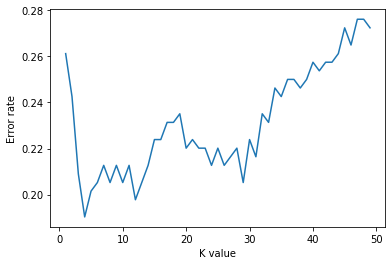

In [70]:
plt.plot(list(range(1, 50)), error_rate_knn)
plt.xlabel('K value')
plt.ylabel('Error rate')

It's clear that further increasing the K value, the error grows along with it.
Let's choose a new K value: K=4 then refit and revaluate the model.

In [76]:
knn_opt = KNeighborsClassifier(n_neighbors=4)
knn_opt.fit(X_train, y_train)
pred_knn_opt = knn_opt.predict(X_test)
print(confusion_matrix(y_test, pred_knn_opt))
print(classification_report(y_test, pred_knn_opt))

[[153  16]
 [ 35  64]]
              precision    recall  f1-score   support

           0       0.81      0.91      0.86       169
           1       0.80      0.65      0.72        99

    accuracy                           0.81       268
   macro avg       0.81      0.78      0.79       268
weighted avg       0.81      0.81      0.80       268



With a new K value the performance slightly improved, but still did not reached the accuracy of the random forest estimator.